In [ ]:
import pandas as pd

# 데이터 로드
file_path = '/content/drive/MyDrive/TermProject/dataset_eng.csv'
data = pd.read_csv(file_path)

# 데이터 컬럼 확인
data.columns

Index(['Delinquency_Status', 'Active_Credit_Check_Cards',
       'Top1_Card_Usage_Amount', 'Top2_Card_Usage_Amount', 'Life_Stage',
       'Credit_Usage_Amount_B0M', 'Check_Usage_Amount_B0M',
       'Industry_Usage_Amount', 'Shopping_Usage_Amount', 'Dining_Usage_Amount',
       'Transport_Usage_Amount', 'Medical_Usage_Amount',
       'Payment_Usage_Amount', 'Education_Usage_Amount',
       'Leisure_Usage_Amount', 'Social_Usage_Amount', 'Daily_Usage_Amount',
       'Overseas_Usage_Amount', 'Top1_Industry', 'Top1_Industry_Usage_Amount',
       'Top2_Industry', 'Top2_Industry_Usage_Amount', 'Top3_Industry',
       'Top3_Industry_Usage_Amount', 'Delinquency_Risk'],
      dtype='object')

# 클래스 불균형 확인

In [ ]:
# 연체위험도 분포 확인
print(f"Delinquency_Risk 0: {data[(data['Delinquency_Risk'] == 0)].shape[0]}")
print(f"Delinquency_Risk 1: {data[(data['Delinquency_Risk'] == 1)].shape[0]}")
print(f"Delinquency_Risk 2: {data[(data['Delinquency_Risk'] == 2)].shape[0]}")


Delinquency_Risk 0: 1771804
Delinquency_Risk 1: 537584
Delinquency_Risk 2: 31231


Delinquency_Risk
0    1771804
1     537584
2      31231
Name: count, dtype: int64


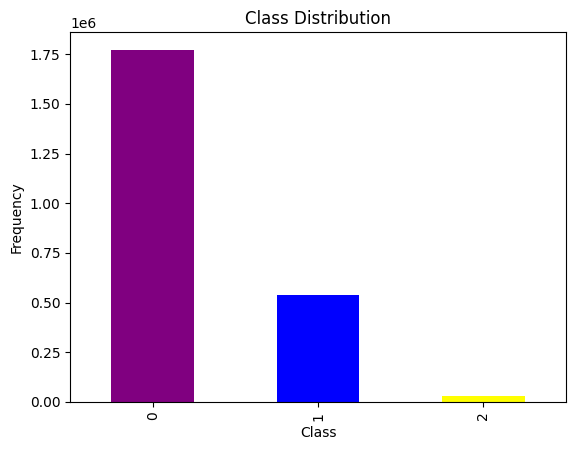

In [ ]:
import pandas as pd

# 클래스 분포 확인
print(data['Delinquency_Risk'].value_counts())

# 시각화
import matplotlib.pyplot as plt
data['Delinquency_Risk'].value_counts().plot(kind='bar', color=['purple', 'blue', 'yellow'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


# PCA


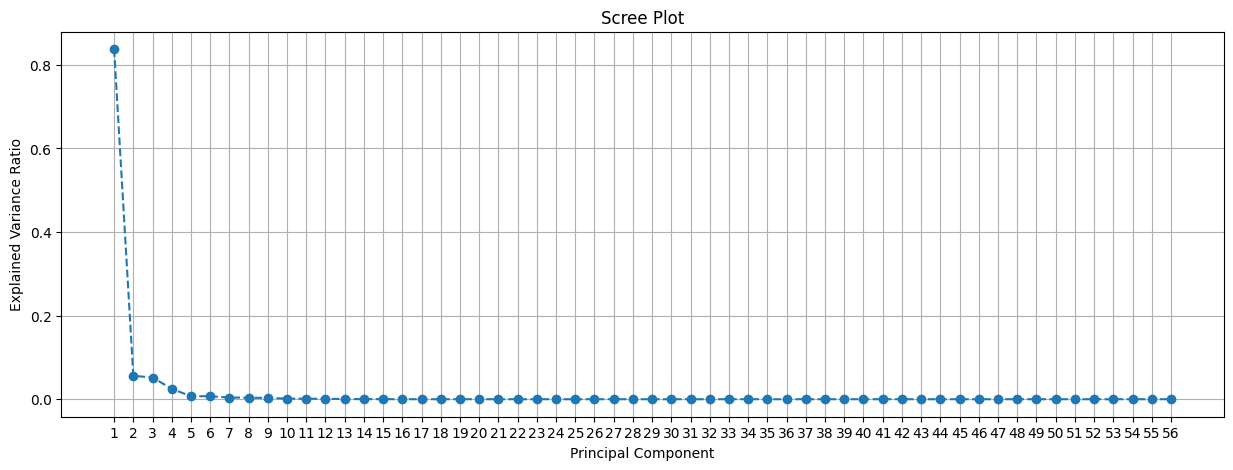

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# 'Life_Stage', 'Top1_Industry', 'Top2_Industry', 'Top3_Industry' 컬럼에 대해 원핫 인코딩 수행
data_encoded = pd.get_dummies(data,
                              columns=['Life_Stage', 'Top1_Industry', 'Top2_Industry', 'Top3_Industry'],
                              prefix=['Life_Stage', 'Top1_Industry', 'Top2_Industry', 'Top3_Industry'])

# 결과 확인
# print(data_encoded)

# PCA에 사용할 숫자형 컬럼 선택 (Delinquency_Risk 제외)
pca_features = [col for col in data_encoded.columns if col != 'Delinquency_Risk']
X = data_encoded[pca_features]

# PCA 객체 생성
pca = PCA()
pca.fit(X)

# Scree Plot 생성
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(15, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.show()



In [ ]:
# PCA 객체 생성
pca = PCA(n_components=4)  # 주성분 4개

# PCA 적용
X_pca = pca.fit_transform(X)

# 결과를 데이터프레임으로 변환
pca_result = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# 결과 확인
# print(pca_result)

# 두 데이터프레임 병합
data = pd.concat([pca_result[['PC1', 'PC2', 'PC3', 'PC4']], data['Delinquency_Risk']], axis=1)

from sklearn.model_selection import StratifiedShuffleSplit
# StratifiedShuffleSplit 설정
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

# Split 수행
for train_index, test_index in split.split(data, data['Delinquency_Risk']):
    reduced_data = data.iloc[test_index]

# 결과 확인
print(reduced_data)

                  PC1            PC2            PC3            PC4
0       -1.562069e+06  -92560.620687   56062.684327  149400.581518
1       -1.383722e+06 -228107.483668    7723.011822  -72269.681736
2       -2.247765e+06  -78408.589752   29354.023696 -116039.928795
3       -2.360195e+06  125373.820474   22313.550847 -233417.327567
4       -2.566240e+06   45725.970091   95122.863817 -398042.705964
...               ...            ...            ...            ...
2340614  4.844725e+05 -522016.356986  132533.734010 -468745.082226
2340615 -1.425035e+06 -215560.571757   43611.389746  -64268.404213
2340616 -3.873408e+05  -54861.351617 -336833.797123  696171.666256
2340617  5.989048e+05 -563834.328833  110108.993709 -130556.868501
2340618 -9.219108e+05   96409.437380 -162002.227468  -61721.488133

[2340619 rows x 4 columns]
                  PC1           PC2           PC3            PC4  \
839996  -2.480660e+06  1.314090e+04  8.424691e+04 -267165.092036   
6345    -7.530477e+05 -5.754362e

In [ ]:
# 연체위험도 분포 확인
print(f"Delinquency_Risk 0: {reduced_data[(reduced_data['Delinquency_Risk'] == 0)].shape[0]}")
print(f"Delinquency_Risk 1: {reduced_data[(reduced_data['Delinquency_Risk'] == 1)].shape[0]}")
print(f"Delinquency_Risk 2: {reduced_data[(reduced_data['Delinquency_Risk'] == 2)].shape[0]}")


Delinquency_Risk 0: 177181
Delinquency_Risk 1: 53758
Delinquency_Risk 2: 3123


In [ ]:
# 각 주성분이 설명하는 분산 비율
print("Explained variance ratio:", pca.explained_variance_ratio_)

# 누적 분산 비율
print("Cumulative explained variance:", pca.explained_variance_ratio_.cumsum())


Explained variance ratio: [0.83750998 0.05611971 0.05185952 0.02478039]
Cumulative explained variance: [0.83750998 0.89362969 0.94548921 0.9702696 ]


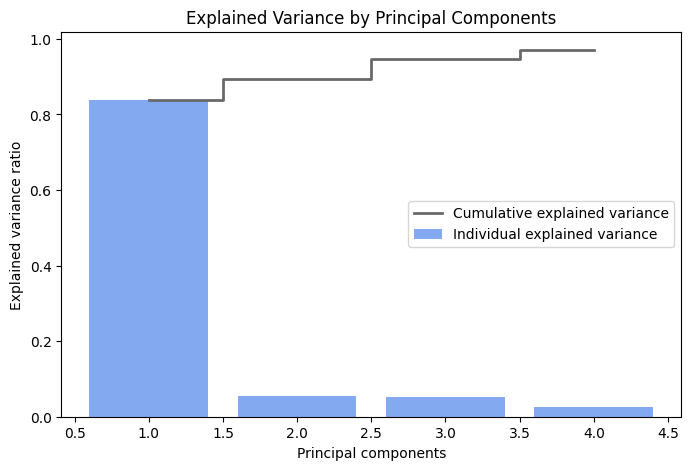

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 주성분별 분산 설명력
explained_variance_ratio = pca.explained_variance_ratio_

# 시각화
plt.figure(figsize=(8, 5))
plt.bar(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    alpha=0.8,
    align='center',
    label='Individual explained variance',
    color='cornflowerblue'  # 부드러운 파란색
)
plt.step(
    range(1, len(np.cumsum(explained_variance_ratio)) + 1),
    np.cumsum(explained_variance_ratio),
    where='mid',
    label='Cumulative explained variance',
    color='dimgray',  # 중립적인 회색
    linewidth=2
)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()


- 막대 그래프는 주성분 별 분산 설명력을 말함
- 선 그래프는 누적으로 주성분들의 분산 설명력을 말하는 것

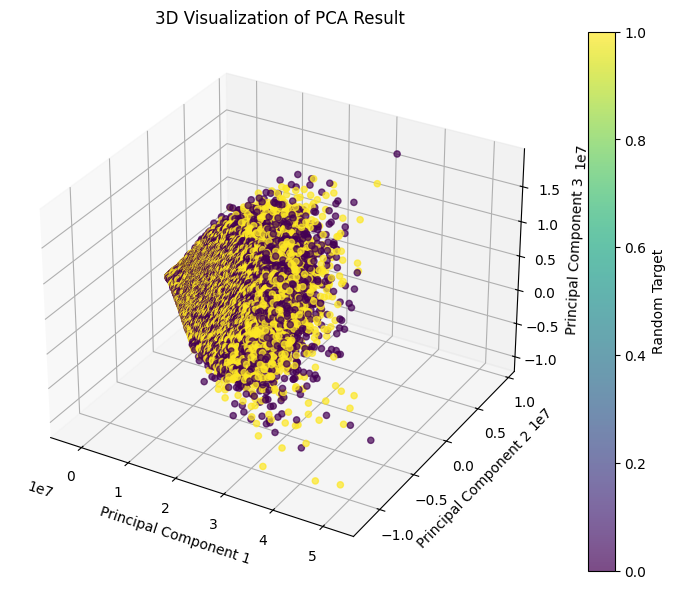

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_result['PC1'], pca_result['PC2'], pca_result['PC3'], c=np.random.randint(0, 2, len(pca_result)), cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Random Target')  # 예시용 타겟값 (실제 타겟 데이터 사용 가능)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D Visualization of PCA Result')
plt.show()


# 모델링


### [ Best Model ] SMOTE- XGBoost

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import numpy as np

# 데이터 분할
X = reduced_data[['PC1', 'PC2', 'PC3', 'PC4']]
y = reduced_data['Delinquency_Risk']

# SMOTEENN 적용
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# 데이터 재분할
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 하이퍼파라미터 그리드 정의
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [7, 8, 9],
    "learning_rate": [0.05, 0.075, 0.1],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9]
}

# XGBoost 모델 초기화
xgb = XGBClassifier(random_state=42)

# RandomizedSearchCV로 최적화
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist, n_iter=50, scoring="f1_macro", cv=3, random_state=42, n_jobs=-1
)

# 모델 학습
random_search.fit(X_train_resampled, y_train_resampled)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", random_search.best_params_)

# 최적 모델로 테스트 데이터 평가
best_model = random_search.best_estimator_
y_pred_xgb = best_model.predict(X_test_resampled)
xgb_report = classification_report(y_test_resampled, y_pred_xgb)
print("Classification Report with Optimized Parameters:\n", xgb_report)



Best Parameters: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Classification Report with Optimized Parameters:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82     18955
           1       0.90      0.76      0.82     25817
           2       0.82      0.92      0.87     32922

    accuracy                           0.84     77694
   macro avg       0.84      0.83      0.84     77694
weighted avg       0.85      0.84      0.84     77694

Classification Report with Optimized Parameters:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82     18955
           1       0.90      0.76      0.82     25817
           2       0.82      0.92      0.87     32922

    accuracy                           0.84     77694
   macro avg       0.84      0.83      0.84     77694
weighted avg       0.85      0.84      0.84     77694

Confusion Matrix:


### SMOTE - RandomForest

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 데이터 분할
X = reduced_data[['PC1', 'PC2', 'PC3', 'PC4']]
y = reduced_data['Delinquency_Risk']

# SMOTEENN 적용
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# 데이터 재분할
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 하이퍼파라미터 그리드 정의
param_dist = {
    "n_estimators": [100, 200],   # 트리의 개수
    "max_depth": [7, 10, 15],   # 트리의 최대 깊이
    "min_samples_split": [2, 5, 10],  # 노드를 분할하기 위한 최소 샘플 수
    "min_samples_leaf": [1, 2, 4],    # 리프 노드의 최소 샘플 수
    "bootstrap": [True, False],       # 부트스트래핑 사용 여부
}

# Random Forest 모델 초기화
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV로 최적화
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=50, scoring="f1_macro", cv=3, random_state=42, n_jobs=-1
)

# 모델 학습
random_search.fit(X_train_resampled, y_train_resampled)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", random_search.best_params_)

# 최적 모델로 테스트 데이터 평가
best_model = random_search.best_estimator_
y_pred_rf = best_model.predict(X_test_resampled)

# Classification Report 출력
rf_report = classification_report(y_test_resampled, y_pred_rf)
print("Classification Report with Optimized Parameters:\n", rf_report)

# Confusion Matrix 출력
conf_matrix = confusion_matrix(y_test_resampled, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix)


### SMOTE - LGBM

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from lightgbm import LGBMClassifier
import numpy as np
import matplotlib.pyplot as plt

# 데이터 분할
X = reduced_data[['PC1', 'PC2', 'PC3', 'PC4']]
y = reduced_data['Delinquency_Risk']

# SMOTEENN 적용
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Resampled 데이터 크기 출력
print(f"Original data size: {X.shape[0]}")
print(f"Resampled data size: {X_resampled.shape[0]}")

# 데이터 재분할
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# 하이퍼파라미터 그리드 정의 (축소)
param_dist = {
   "n_estimators": [200, 300, 500],
    "max_depth": [7, 9, -1],
    "learning_rate": [0.05, 0.075, 0.1],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "num_leaves": [31, 50],
    "min_child_samples": [10, 20, 30],
    "min_child_weight": [0.001, 0.01, 0.1]
}



# LightGBM 모델 초기화
lgbm = LGBMClassifier(random_state=42)

# RandomizedSearchCV로 최적화 (n_iter 감소)
random_search = RandomizedSearchCV(
    lgbm, param_distributions=param_dist, n_iter=20, scoring="f1_macro", cv=3, random_state=42, n_jobs=-1
)

# 모델 학습
random_search.fit(X_train_resampled, y_train_resampled)

# 최적의 하이퍼파라미터 출력
print("Best Parameters:", random_search.best_params_)

# 최적 모델로 테스트 데이터 평가
best_model = random_search.best_estimator_
y_pred_lgbm = best_model.predict(X_test_resampled)

# Classification Report 출력
lgbm_report = classification_report(y_test_resampled, y_pred_lgbm)
print("Classification Report with Optimized Parameters:\n", lgbm_report)

# Confusion Matrix 출력
conf_matrix = confusion_matrix(y_test_resampled, y_pred_lgbm)
print("Confusion Matrix:\n", conf_matrix)

# Feature Importance 시각화
feature_importance = best_model.feature_importances_
plt.barh(X.columns, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in LightGBM")
plt.show()
